In [2]:
import warnings

import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
data = pd.read_csv("dataset/data4/data4.csv")

In [2]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []
        # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

In [22]:
def make_pdf(dist, params:list, size=10000):
        """
        Generate distributions's Probability Distribution Function

        Args:
            dist: Distribution
            params(list): parameter
            size(int): size

        Returns:
            dataframe: Power Distribution Function

        """

        # Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]

        # Get sane start and end points of distribution
        start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
        end   = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

        # Build PDF and turn into pandas Series
        x = np.linspace(start, end, size)
        y = dist.pdf(x, loc=loc, scale=scale, *arg)
        pdf = pd.Series(y, x)

        return pdf

In [34]:
d=data[data.stillExists==True]['numVotes']
d.shape

(3670,)

  1 / 105: ksone
  2 / 105: kstwo
  3 / 105: kstwobign
  4 / 105: norm
  5 / 105: alpha
  6 / 105: anglit
  7 / 105: arcsine
  8 / 105: beta
  9 / 105: betaprime
 10 / 105: bradford
 11 / 105: burr
 12 / 105: burr12
 13 / 105: fisk
 14 / 105: cauchy
 15 / 105: chi
 16 / 105: chi2
 17 / 105: cosine
 18 / 105: dgamma
 19 / 105: dweibull
 20 / 105: expon
 21 / 105: exponnorm
 22 / 105: exponweib
 23 / 105: exponpow
 24 / 105: fatiguelife
 25 / 105: foldcauchy
 26 / 105: f
 27 / 105: foldnorm
 28 / 105: weibull_min
 29 / 105: truncweibull_min
 30 / 105: weibull_max
 31 / 105: genlogistic
 32 / 105: genpareto
 33 / 105: genexpon
 34 / 105: genextreme
 35 / 105: gamma
 36 / 105: erlang
 37 / 105: gengamma
 38 / 105: genhalflogistic
 39 / 105: genhyperbolic
 40 / 105: gompertz
 41 / 105: gumbel_r
 42 / 105: gumbel_l
 43 / 105: halfcauchy
 44 / 105: halflogistic
 45 / 105: halfnorm
 46 / 105: hypsecant
 47 / 105: gausshyper
 48 / 105: invgamma
 49 / 105: invgauss
 50 / 105: geninvgauss
 51 / 1

Text(0, 0.5, 'Frequency')

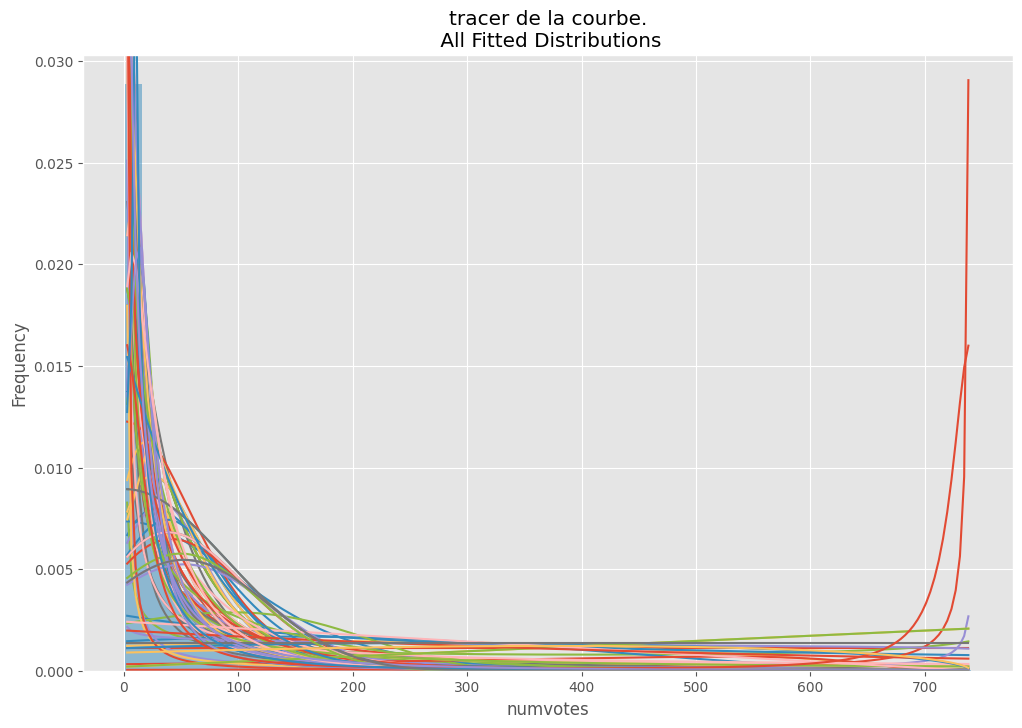

In [36]:
datatOgIVE =data[data.stillExists==True]['numVotes']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = datatOgIVE.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(datatOgIVE, 200, ax)
best_dist = best_distibutions[0]
ax.set_ylim(dataYLim)
ax.set_title(u'tracer de la courbe.\n All Fitted Distributions')
ax.set_xlabel(u'numvotes')
ax.set_ylabel('Frequency')


In [37]:
dataYLim

(0.0, 0.030313812390998958)

Text(0, 0.5, 'Frequency')

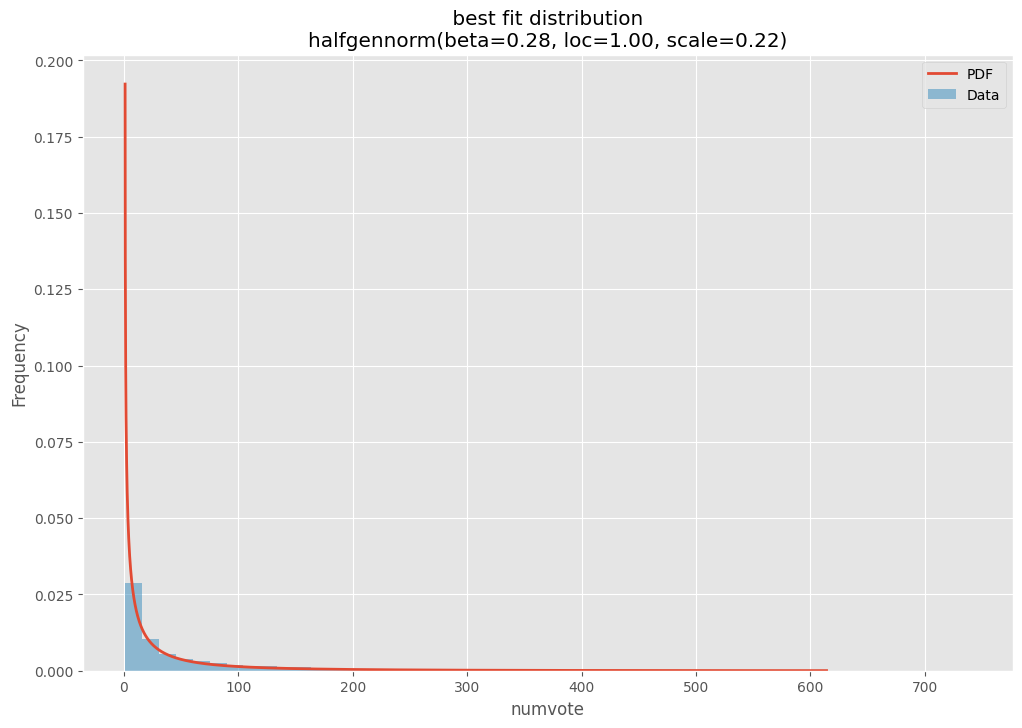

In [44]:
pdf = make_pdf(dist=best_dist[0], params=list(best_dist[1]), size=3680)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
datatOgIVE.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u' best fit distribution \n' + dist_str)
ax.set_xlabel(u'numvote')
ax.set_ylabel('Frequency')

In [45]:
# Creating dataset
a = np.random.randint(100, size =(50))

# Creating histogram
np.histogram(a, bins = [0, 10, 20, 30, 40,
                        50, 60, 70, 80, 90,
                        100])

hist, bins = np.histogram(a, bins = [0, 10,
                                     20, 30,
                                     40, 50,
                                     60, 70,
                                     80, 90,
                                     100])

# printing histogram
print()
print(a)
print (hist)
print (bins)
print()


[ 5 57 52 83 16 74 44 91 84 21 19  1 44 68 93 49 48 30 70 35 30 30 83 65
 75 10 70 11 19 77 62 56 51  2 12  5 83 35  7 99 25 21 42 71 16 39 63 72
 46 25]
[5 7 4 6 6 4 4 7 4 3]
[  0  10  20  30  40  50  60  70  80  90 100]



Text(0.5, 1.0, 'Numpy Histogram')

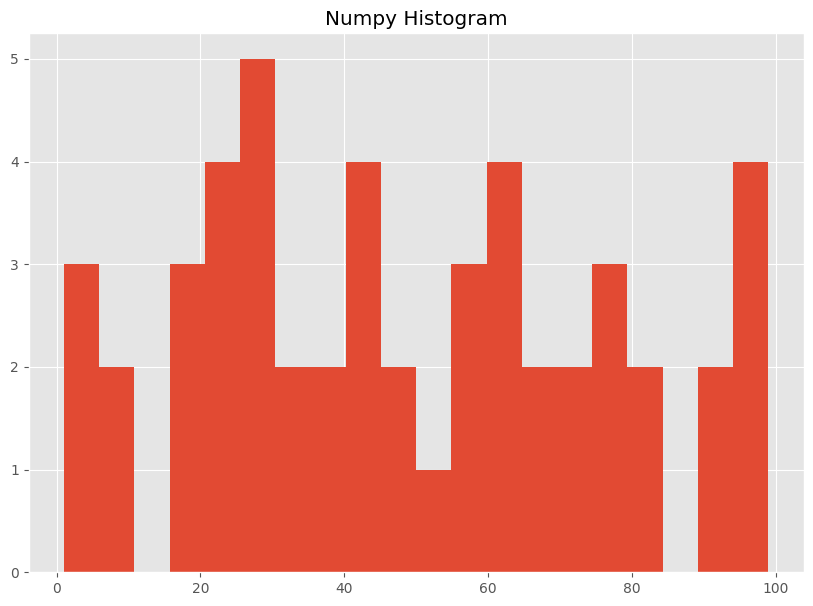

In [32]:
# Creating dataset
a = np.random.randint(100, size =(50))

# Creating plot
fig = plt.figure(figsize =(10, 7))

plt.hist(a, bins = 20)

plt.title("Numpy Histogram")

In [42]:
x = np.linspace(1, 2, 5)

In [43]:
x

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [10]:
dictionary = data['stillExists'].value_counts().to_dict()

In [14]:
key_list = list(dictionary.keys())

In [8]:
col = data.columns.to_list()

In [9]:
col.re

['numVotes', 'vote', 'stillExists']

In [16]:
data['stillExists'].unique()

array([ True, False])

In [4]:
data

,numVotes,vote,stillExists
0,4.0,2.500000,True
1,72.0,2.250000,True
2,14.0,3.142857,False
3,22.0,3.454545,True
4,195.0,3.856410,True
...,...,...,...
4372,1.0,3.000000,True
4373,1.0,3.000000,True
4374,1.0,4.000000,True
4375,7.0,3.571429,True


In [6]:
dictionary = data['stillExists'].value_counts().to_dict()
liste_target_value = list(dictionary.keys())

In [10]:
if data['numVotes'].dtype == bool :
    print('yessssssss')

In [17]:
data[data['stillExists'] == False]['vote'].sum()


2040.9689475310774